# Statistics with Python. Final Project.

## This notebook is the final assignment for IBM's Statistics with Python course on Coursera. The first part covers data visualization, while the second is dedicated to conducting different statistical tests.

## 1. Preparing the Data.

In [142]:
# Importing the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [144]:
# Labling the columns

column_names = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", 
    "PTRATIO", "B", "LSTAT"
]

# Creating a DataFrame with these column lables
boston_df = pd.DataFrame(data, columns=column_names)
boston_df['MEDV'] = target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## 2. Descriptive Statistics and Visualizations

### Median value of owner-occupied homes

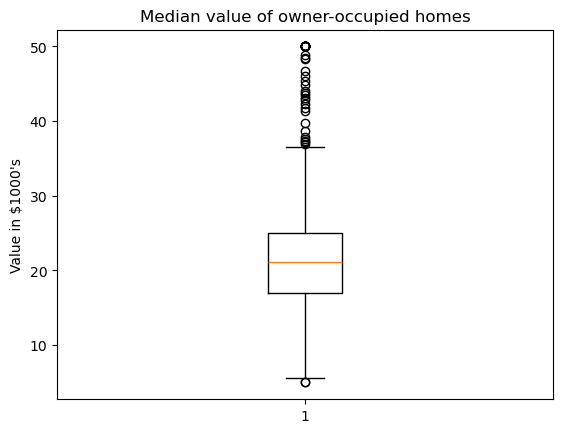

In [146]:
# Creating a boxplot for MEDV

plt.boxplot(boston_df['MEDV'])
plt.title('Median value of owner-occupied homes')
plt.ylabel('Value in $1000\'s')
plt.show()

The boxplot shows that most values are concentrated between 18 and 25, with the significant presence of the outliners in the range from 35 to 50.

### Charles river variable

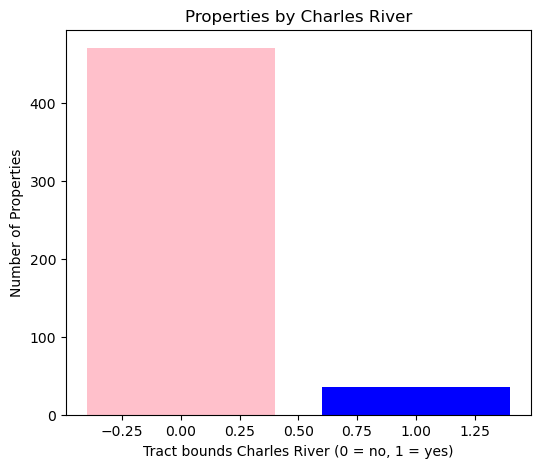

In [148]:
# Counting the values from CHAS

chas_counts = boston_df['CHAS'].value_counts()

# Creating a bar plot

plt.figure(figsize=(6, 5))
plt.title('Properties by Charles River')
plt.ylabel('Number of Properties')
plt.xlabel('Tract bounds Charles River (0 = no, 1 = yes)')
plt.bar(chas_counts.index, chas_counts.values, color=['pink', 'blue'])

plt.show()

Only a small number of properties in tracts bounding the Charles River. Most of the properties are not near the river.

### Median value of owner-occupied homes against the age of the property

In [150]:
# Discretizing the age variable into three groups

bdf_35_y = boston_df[boston_df['AGE'] <= 35]['MEDV']
bdf_35_70 = boston_df[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70)]['MEDV']
bdf_70_o = boston_df[boston_df['AGE'] >= 70]['MEDV']

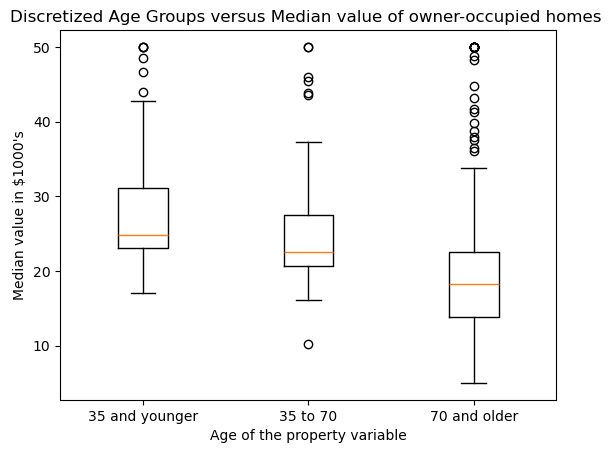

In [152]:
# Creating a boxplot for discretized AGE versus MEDV

plt.boxplot([bdf_35_y, bdf_35_70, bdf_70_o], labels=['35 and younger', '35 to 70', '70 and older'])
plt.xlabel('Age of the property variable')
plt.ylabel('Median value in $1000\'s')
plt.title('Discretized Age Groups versus Median value of owner-occupied homes ')
plt.show()

With a significant variability in values, new properties mostly valued higher than old ones. Also older properties have a larger number of the outliers.

### Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town

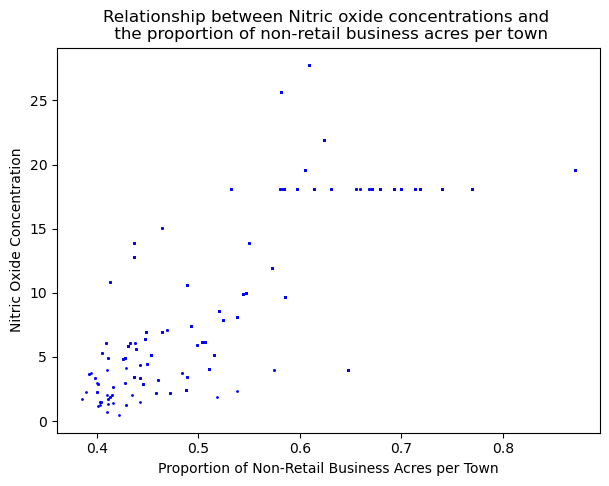

In [154]:
# Creating a scatter plot of NOX to INDUS

plt.figure(figsize=(7, 5))
x = boston_df['NOX']
y = boston_df['INDUS']

plt.title('Relationship between Nitric oxide concentrations and \n the proportion of non-retail business acres per town')
plt.xlabel('Proportion of Non-Retail Business Acres per Town')
plt.ylabel('Nitric Oxide Concentration')
plt.scatter(x, y, s=1, c='blue', alpha=1)
plt.show()

There is a positive correlation between the proportion of non-retail business acres and nitric oxide concentration. We can conclude that areas with more industry responsible for higher air polution.

### Pupil to teacher ratio variable

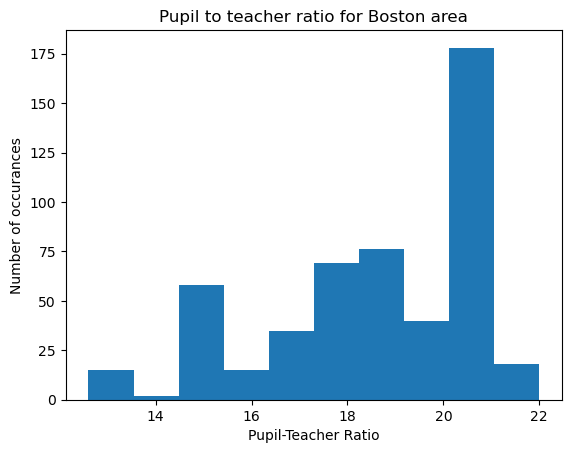

In [156]:
# Creating a histogram for PTRATIO

plt.hist(boston_df['PTRATIO'])
plt.title('Pupil to teacher ratio for Boston area')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Number of occurances')
plt.show()

One can see a similar distribution of the ratio across the area with a significant number of occurrences of the ratio 21.

## 3. Statistical tests

### Is there a significant difference in the median value of houses bounded by the Charles river or not? 

H0: There is no significant difference in median value\
H1: There is a significant difference in median value

In [158]:
# Conducting the Levene test to check the equality of the variances

scipy.stats.levene(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], center='mean')


LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

The variances are unequal.

In [161]:
# Conducting Welch's t-test

scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1]['MEDV'], equal_var = False)

TtestResult(statistic=-3.113291312794837, pvalue=0.0035671700981375174, df=36.876408797611994)

The p-value is less than alpha value (0.05). We reject the null hypothesis as there is not enough proof that there is no significant difference in median value of houses bounded by the Charles river.

### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)?

H0: There is no significant difference in median value for each proportion of owner occupied. \
H1: There is a significant difference in median value for each proportion of owner occupied.

In [163]:
# Conducting the Levene Test

scipy.stats.levene(bdf_35_y, bdf_35_70, bdf_70_o, center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

In [165]:
# Conducting one-way ANOVA

f_statistic, p_value = scipy.stats.f_oneway(bdf_35_y, bdf_35_70, bdf_70_o)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


The p-value is less than alpha value (0.05). We reject the null hypothesis. The p-value indicates that there is a significant difference in median value between the proportions.

### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town?

H0: There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town. \
H1: There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

In [167]:
# Running the Pearson correlation test

scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209157, pvalue=7.913361061236247e-98)

The p-value is less than alpha value (0.05). We reject the null hypothesis. There is a significant relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes?

H0: There is no impact of additional weighted distance to the five Boston employment centres on the median value of owner occupied homes. \
H1: There is an impact of additional weighted distance to the five Boston employment centres on the median value of owner occupied homes.

In [169]:
# Conducting regression analysis
import statsmodels.api as sm

X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 07 Nov 2024   Prob (F-statistic):           1.21e-08
Time:                        12:37:43   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The p-value is less than alpha value (0.05). We reject the null hypothesis.  There is a significant impact of additional weighted distance to the five Boston employment centres on the median value of owner occupied homes. Also low R-squared suggests that there may be other factors that impact the median value of owner occupied homes.